In [1]:
from AROMA import *
from AROMA.utils import *
from AROMA.config import *
import pandas as pd
from scipy.optimize import curve_fit

%matplotlib widget

pi = np.pi 

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
print('def: find_nearest(array, value)')

def powerfunc_ten(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6,amp7,shift7,amp8,shift8,amp9,shift9,amp10,shift10):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    shifted4=amp4*shift(sinepw,shift4)
    shifted5=amp5*shift(sinepw,shift5)
    shifted6=amp6*shift(sinepw,shift6)
    shifted7=amp1*shift(sinepw,shift7)
    shifted8=amp2*shift(sinepw,shift8)
    shifted9=amp3*shift(sinepw,shift9)
    shifted10=amp4*shift(sinepw,shift10)
    return shifted1+shifted2+shifted3+shifted4+shifted5+shifted6+shifted7+shifted8+shifted9+shifted10
print('def: powerfunc_ten(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6,amp7,shift7,amp8,shift8,amp9,shift9,amp10,shift10)')

def powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    shifted4=amp4*shift(sinepw,shift4)
    shifted5=amp5*shift(sinepw,shift5)
    shifted6=amp6*shift(sinepw,shift6)
    return shifted1+shifted2+shifted3+shifted4+shifted5+shifted6
print('def: powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6)')

def powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    shifted4=amp4*shift(sinepw,shift4)
    return shifted1+shifted2+shifted3+shifted4
print('def: powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4)')
      
def powerfunc(hpp,amp1,shift1,amp2,shift2,amp3,shift3):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    return shifted1+shifted2+shifted3
print('def: powerfunc(hpp,amp1,shift1,amp2,shift2,amp3,shift3)')
      
def powerfuncsingle(hpp,amp1,shift1):
    shifted1=amp1*shift(sinepw,shift1)
    return shifted1
print('def: powerfuncsingle(hpp,amp1,shift1)')

import os
from os.path import join
array = os.path.abspath('').split('/')
homedir = '/'
for i in range(1,7):
   homedir = join(homedir, array[i])
homedir

import numpy.random as random
from astropy import units as u
import matplotlib.patches as patches
def: find_nearest(array, value)
def: powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6)
def: powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4)
def: powerfunc(hpp,amp1,shift1,amp2,shift2,amp3,shift3)
def: powerfuncsingle(hpp,amp1,shift1)
data_dir :  ~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data
data_path :  ~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/processed/luhman_16ab_sector36-37.txt
plot_dir :  ~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/plots
def: find_nearest(array, value)
def: powerfunc_ten(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6,amp7,shift7,amp8,shift8,amp9,shift9,amp10,shift10)
def: powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6)
def: powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4)
def: powerfunc(hpp,

'/Users/nguyendat/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping'

In [177]:
data_path = '~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/processed/luhman_16ab_sector36-37_longPeriodsRemoved.txt'
data = pd.read_csv(data_path, header=0, delimiter='\t')
plotPath = join(homedir, 'plots')

# data = data.query('TIME < 2293') # first half of sector 36 
# data = data.query('TIME > 2293 & TIME < 2306') # second half of sector 36 
# data = data.query('TIME < 2306') # full of sector 36

# data = data.query('TIME > 2306 & TIME < 2320') # first half of sector  37 
# data = data.query('TIME > 2320') # second half of sector  37 
# data = data.query('TIME > 2306') # full of sector 37

data = data # full light curve
fit_dir = join(homedir,'notebooks', 'periodSineFit_metadata')

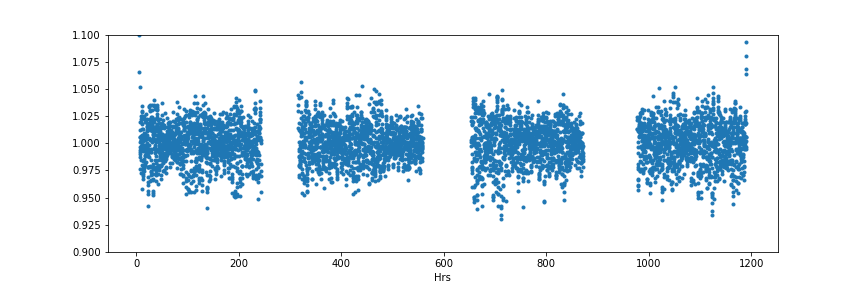

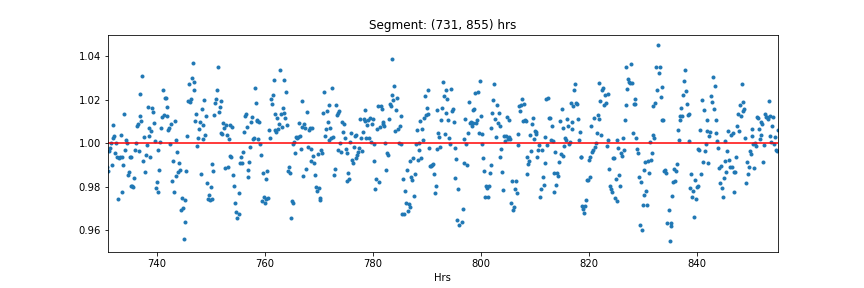

In [195]:
# %matplotlib inline
%matplotlib widget
time, lc = data.TIME, data.lc_corrected
# time, lc = data.TIME.rolling(window=2).median(), data.lc_corrected.rolling(window=2).median()
# time, lc = data.TIME[::1], data.lc_corrected[::1]
# time, lc = data.TIME[::2], data.lc_corrected[::2]
# time, lc = data.TIME[::3], data.lc_corrected[::3]

plt.figure(figsize=(12, 4)), plt.plot(time, lc, ls='', marker='o', ms=3.0), plt.xlabel('Hrs')
plt.ylim((0.90, 1.10))

segments = [(731, 855)]
# plt.close('all')
for seg in segments:
    plt.figure(figsize=(12, 4)), plt.plot(time, lc, ls='', marker='o', ms=3.0), plt.xlim(seg), plt.xlabel('Hrs'), plt.title("Segment: "+str(seg)+" hrs"), 
    plt.ylim((0.95, 1.05))
    plt.axhline(y=1, xmin=0, xmax=1200, c='r')

In [196]:
def sixsines(time, a1, p1, a2, p2, a3, p3, a4, p4, a5, p5, a6, p6, offset):
    periods = np.array([4.58, 4.68, 4.98, 5.21, 5.26, 5.34])
    om = 2*pi/periods
    
    sine1 = a1 * np.sin(om[0]*time + p1)
    sine2 = a2 * np.sin(om[1]*time + p2)
    sine3 = a3 * np.sin(om[2]*time + p3)
    sine4 = a4 * np.sin(om[3]*time + p4)
    sine5 = a5 * np.sin(om[4]*time + p5)
    sine6 = a6 * np.sin(om[5]*time + p6)
    fit = sine1 + sine2 + sine3 + sine4 + sine5 + sine6 + offset
    
    if not residual: 
        return fit
    else:
        res = np.sum( ((data-fit)/0.003)**2 )
        return (fit, res)

def threesines (time, a1, p1, a2, p2, a3, p3, offset):
    periods = np.array([4.68, 4.98, 5.26])
    om = 2*pi/periods
    
    sine1 = a1 * np.sin(om[0]*time + p1)
    sine2 = a2 * np.sin(om[1]*time + p2)
    sine3 = a3 * np.sin(om[2]*time + p3)
    fit = sine1 + sine2 + sine3
    
    return fit

[ 0.02921153 -1.735712    0.02504131  0.08833459  0.03211626  0.53368976
  2.        ]


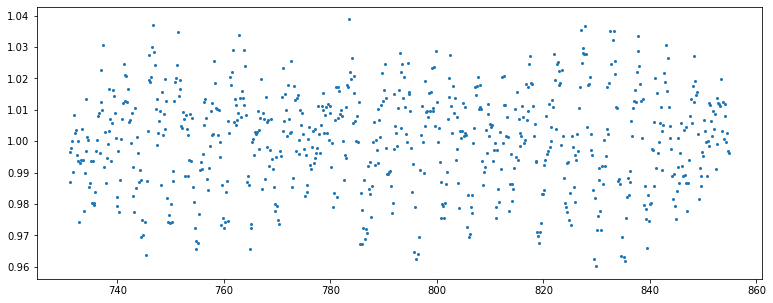

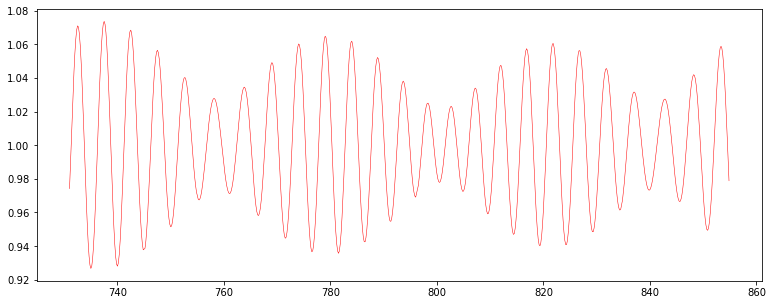

In [197]:
%matplotlib inline

tlow, thigh = segments[0][0], segments[0][1]
# periods3 = np.array([4.68, 4.98, 5.26])
periods3 = np.array([4.68, 5.26, 5.34])
om3 = 2*pi/periods3

# a1, a2, a3 = 1,2,3
# p1, p2, p3 = 1,2,3
# plt.figure(figsize=(13,5)), plt.tight_layout()
# plt.plot(time, threesines(a1, p1, a2, p2, a3, p3, offset=0.5, time=time), ls='', marker='o', ms=2)

# guess = [1, 0.5, 
#          1, 0.5, 
#          1, 0.5, 
#          1]
lim = [(0, np.inf), (-np.inf, np.inf), 
       (0, np.inf), (-np.inf, np.inf), 
       (0, np.inf), (-np.inf, np.inf), 
       (0, np.inf)]
guesses=[0.5, -0.4, 0.5, 0.3, 0.5, -0.2, 2]

fluxlow, fluxhigh = 0.96, 1.04
subset = data.query('TIME < %f & TIME >= %f'%(thigh, tlow))
subset = subset.query('lc_corrected >= %f & lc_corrected <= %f'%(fluxlow, fluxhigh))
timearr = subset.TIME
lcarr = subset.lc_corrected

popt, pcov = curve_fit(threesines, timearr, lcarr, p0=guesses, bounds=np.transpose(lim))
fit = threesines(timearr, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6]) + 1
print(popt)

plt.figure(figsize=(13,5)), plt.tight_layout()
plt.plot(timearr, lcarr, ls='', marker='o', ms=2)
plt.figure(figsize=(13,5)), plt.tight_layout()
plt.plot(timearr, fit, c='r', lw=0.5)

# hyperOPT Decision Tree

In [198]:
import sklearn 
from sklearn.metrics import mean_squared_error, r2_score
from hyperopt import hp, tpe, Trials, fmin
import time
pi = np.pi

In [199]:
# choose time subset
tlow, thigh = segments[0]
# data = data
data = pd.read_csv(data_path, header=0, delimiter='\t')
subset = data.query('TIME < %f & TIME >= %f'%(thigh, tlow))

periods3 = np.array([2.5, 4.98, 5.26])
om3 = 2*pi/periods3
w1, w2, w3 = om3[0], om3[1], om3[2]
# w1, w2, w3 = 1.343, 1.262, 1.195

# known_freq = True # prescribe 3 known freq
known_freq = False # guess freq from fit

if known_freq:
    w1, w2, w3

# random split the data into train and test
x_data = subset.TIME
y_data = subset.lc_corrected
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=42)

# if known_freq:
#     def objective(a0, a1, f1, a2, f2, a3, f3):
#         """Objective function to minimize"""
#         w1, w2, w3 = om3[0], om3[1], om3[2]
#         return np.mean((a0+ a1 * np.sin(w1*X_train + f1) + a2 * np.sin(w2*X_train + f2) + a3 * np.sin(w3*X_train + f3) - y_train)**2)
    
#     def objective2(args):
#         return objective(*args)
# else:
#     def objective(a0, a1, f1, a2, f2, a3, f3, w1, w2, w3):
#         """Objective function to minimize"""
#         return np.mean((a0+ a1 * np.sin(w1*X_train + f1) + a2 * np.sin(w2*X_train + f2) + a3 * np.sin(w3*X_train + f3) - y_train)**2)

#     def objective2(args):
#         return objective(*args)

if known_freq:
    def objective(a0, a1, f1, a2, f2, a3, f3):
        """Objective function to minimize"""
        w1, w2, w3 = om3[0], om3[1], om3[2]
        return np.mean((a0+ a1 * np.sin(w1*X_train + f1) + a2 * np.sin(w2*X_train + f2) + a3 * np.sin(w3*X_train + f3) - y_train)**2)
    
    def objective2(args):
        return objective(*args)
else:
    def objective(a0, a1, f1, a2, f2, a3, f3, a4, f4, a5, f5, w1, w2, w3, w4, w5):
        """Objective function to minimize"""
        return np.mean((a0
                        + a1 * np.sin(w1*X_train + f1) 
                        + a2 * np.sin(w2*X_train + f2) 
                        + a3 * np.sin(w3*X_train + f3) 
                        + a4 * np.sin(w4*X_train + f4) 
                        + a5 * np.sin(w5*X_train + f5) - y_train)**2)

    def objective2(args):
        return objective(*args)
    
# seed = 12345512
# seed = 12345513
# seed = 12345514
seed = 12345515

np.random.seed(seed)

In [200]:
from hyperopt import hp, tpe, Trials, fmin
from IPython.display import display, Math

bounds = [[0.98, 1.01],
          [1e-2, 3e-1],
          [-np.pi, np.pi],
          [1e-2, 3e-1],
          [-np.pi, np.pi],
          [1e-2, 3e-1],
          [-np.pi, np.pi],
          [1e-2, 3e-1],
          [-np.pi, np.pi],
          [1e-2, 3e-1],
          [-np.pi, np.pi],
          [1.0, 1.5],
          [1.0, 1.5],
          [1.0, 1.5],
          [1.0, 1.5],
          [1.0, 1.5]
          # [2.3, 2.7],
          # [2.3, 2.7]
         ]

# bounds = [[0.999, 1.001],
#           [0.01, 0.1],
#           [-0.8, 0],
#           [0.01, 0.1],
#           [-2, 0],
#           [0.01, 0.1],
#           [-2, 0],
#           [0.01, 0.1],
#           [-1.5, 0],
#           [0.01, 0.1],
#           [-1.5, 0],
#           [1.1, 1.4],
#           [1.1, 1.4],
#           [1.1, 1.4],
#           [1.1, 1.4],
#           [1.1, 1.4]]

if known_freq:
    space = [hp.uniform('a0', bounds[0][0], bounds[0][1]),
             hp.uniform('a1', bounds[1][0], bounds[1][1]), 
             hp.uniform('f1', bounds[2][0], bounds[2][1]),
             hp.uniform('a2', bounds[3][0], bounds[3][1]), 
             hp.uniform('f2', bounds[4][0], bounds[4][1]),
             hp.uniform('a3', bounds[5][0], bounds[5][1]), 
             hp.uniform('f3', bounds[6][0], bounds[6][1])]
    
else:
    space = [hp.uniform('a0', bounds[0][0], bounds[0][1]),
             hp.uniform('a1', bounds[1][0], bounds[1][1]), 
             hp.uniform('f1', bounds[2][0], bounds[2][1]),
             hp.uniform('a2', bounds[3][0], bounds[3][1]), 
             hp.uniform('f2', bounds[4][0], bounds[4][1]),
             hp.uniform('a3', bounds[5][0], bounds[5][1]), 
             hp.uniform('f3', bounds[6][0], bounds[6][1]),
             hp.uniform('a4', bounds[7][0], bounds[7][1]), 
             hp.uniform('f4', bounds[8][0], bounds[8][1]),
             hp.uniform('a5', bounds[9][0], bounds[9][1]), 
             hp.uniform('f5', bounds[10][0], bounds[10][1]),
             hp.uniform('w1', bounds[11][0], bounds[11][1]),
             hp.uniform('w2', bounds[12][0], bounds[12][1]),
             hp.uniform('w3', bounds[13][0], bounds[13][1]),
             hp.uniform('w4', bounds[14][0], bounds[14][1]),
             hp.uniform('w5', bounds[15][0], bounds[15][1])]
# else:
#     space = [hp.uniform('a0', bounds[0][0], bounds[0][1]),
#              hp.uniform('a1', bounds[1][0], bounds[1][1]), 
#              hp.uniform('f1', bounds[2][0], bounds[2][1]),
#              hp.uniform('a2', bounds[3][0], bounds[3][1]), 
#              hp.uniform('f2', bounds[4][0], bounds[4][1]),
#              hp.uniform('a3', bounds[5][0], bounds[5][1]), 
#              hp.uniform('f3', bounds[6][0], bounds[6][1]),
#              hp.uniform('w1', bounds[7][0], bounds[7][1]),
#              hp.uniform('w2', bounds[8][0], bounds[8][1]),
#              hp.uniform('w3', bounds[9][0], bounds[9][1])]

In [201]:

tpe_algo = tpe.suggest
tpe_trials = Trials()

# tpe_best = fmin(fn=objective2, space=space, algo=tpe_algo, trials=tpe_trials, max_evals=1000, rstate=np.random.default_rng(seed))
# tpe_best = fmin(fn=objective2, space=space, algo=tpe_algo, trials=tpe_trials, max_evals=2000, rstate=np.random.default_rng(seed))
# tpe_best = fmin(fn=objective2, space=space, algo=tpe_algo, trials=tpe_trials, max_evals=4000, rstate=np.random.default_rng(seed))
tpe_best = fmin(fn=objective2, space=space, algo=tpe_algo, trials=tpe_trials, max_evals=10000, rstate=np.random.default_rng(seed))


if known_freq:
    print('Prescribed frequency')
    display(Math('\\omega_1={:.2f}, \\omega_2={:.2f}, \\omega_3={:.2f}, \\omega_4={:.2f}, \\omega_5={:.2f}'.format(*[w1, w2, w3, w4, w5])))

    print('Fitted parameters:')
    display(Math('a_0={a0:.5f}, a_1={a1:.2e}, \\phi_1={f1:.2f}, a_2={a2:.2e}, \\phi_2={f2:.2f}, a_3={a3:.2e}, \\phi_3={f3:.2f}'.format(**tpe_best)))
    
else:
    print('Fitted parameters:')
    display(Math('a_0={a0:.5f}, a_1={a1:.2e}, \\phi_1={f1:.2f}, a_2={a2:.2e}, \\phi_2={f2:.2f},\
    a_3={a3:.2e}, \\phi_3={f3:.2f},  a_4={a4:.2e}, \\phi_4={f4:.2f}, a_5={a4:.2e}, \\phi_5={f4:.2f},\
    \\omega_1={w1:.2f}, \\omega_2={w2:.2f}, \\omega_3={w3:.2f}, \\omega_4={w4:.2f}, \\omega_5={w5:.2f}'.format(**tpe_best)))
    
# else:
#     print('Fitted parameters:')
#     display(Math('a_0={a0:.5f}, a_1={a1:.2e}, \\phi_1={f1:.2f}, a_2={a2:.2e}, \\phi_2={f2:.2f}, a_3={a3:.2e}, \\phi_3={f3:.2f}, \\omega_1={w1:.2f}, \\omega_2={w2:.2f}, \\omega_3={w3:.2f}'.format(**tpe_best)))

100%|█████████████████████████████████| 10000/10000 [23:41<00:00,  7.03trial/s, best loss: 0.00025332663976967393]
Fitted parameters:


<IPython.core.display.Math object>

mse: 0.00029592069284637996
r2: -0.0349361695778283
std of residual: 1.58e-02
Fitted parameters:


<IPython.core.display.Math object>

5.037, 5.067, 5.045, 5.042, 5.058
1.247, 1.240, 1.245, 1.246, 1.242
{'a0': 0.9948139827711981, 'a1': 0.03881091441712253, 'a2': 0.014875588578240456, 'a3': 0.01954063449341543, 'a4': 0.019280041478387865, 'a5': 0.014942363128953504, 'f1': -1.3939399958645315, 'f2': 2.368912168323582, 'f3': 1.173874200152214, 'f4': 2.0001933808171737, 'f5': 0.48377286908354933, 'w1': 1.2474356315259736, 'w2': 1.239985179042569, 'w3': 1.245429406277915, 'w4': 1.2462816805669061, 'w5': 1.242113625562501}


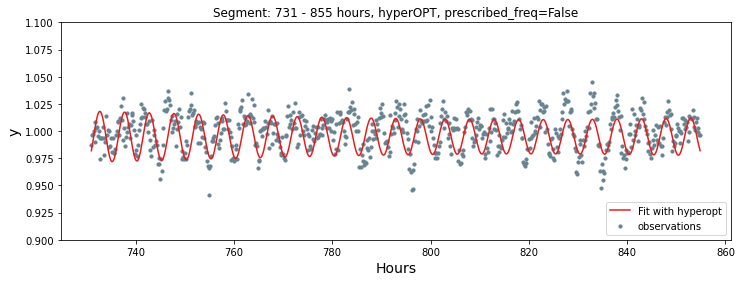

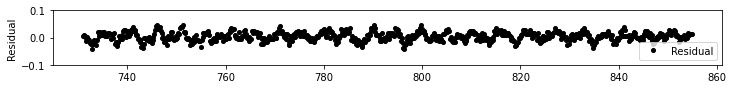

In [202]:
# Test
plt.close('all')
from sklearn.metrics import mean_squared_error, r2_score
tlow, thigh = segments[0]
subset = data.query('TIME < %f & TIME >= %f'%(thigh, tlow))
x_data = subset.TIME
y_data = subset.lc_corrected
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=42)

if known_freq:
    ypred = tpe_best['a0']+ tpe_best['a1'] * np.sin(w1 * X_test + tpe_best['f1']) +tpe_best['a2'] * np.sin(w2 * X_test + tpe_best['f2']) +tpe_best['a3'] * np.sin(w3 * X_test + tpe_best['f3']) +tpe_best['a4'] * np.sin(w4 * X_test + tpe_best['f4'])
    y = tpe_best['a0'] + tpe_best['a1'] * np.sin(w1* x_data + tpe_best['f1']) + tpe_best['a2'] * np.sin(w2 * x_data + tpe_best['f2']) + tpe_best['a3'] * np.sin(w3 * x_data + tpe_best['f3']) +tpe_best['a4'] * np.sin(w4 * x_data + tpe_best['f4'])
else:
    ypred = [tpe_best['a0'] +tpe_best['a1'] * np.sin(tpe_best['w1'] * X_test + tpe_best['f1']) 
                            +tpe_best['a2'] * np.sin(tpe_best['w2'] * X_test + tpe_best['f2']) 
                            +tpe_best['a3'] * np.sin(tpe_best['w3'] * X_test + tpe_best['f3']) 
                            +tpe_best['a4'] * np.sin(tpe_best['w4'] * X_test + tpe_best['f4'])
                            +tpe_best['a5'] * np.sin(tpe_best['w5'] * X_test + tpe_best['f5'])][0]
                
    y =  [tpe_best['a0'] +tpe_best['a1'] * np.sin(tpe_best['w1']* x_data + tpe_best['f1'])
                        +tpe_best['a2'] * np.sin(tpe_best['w2'] * x_data + tpe_best['f2']) 
                        +tpe_best['a3'] * np.sin(tpe_best['w3'] * x_data + tpe_best['f3'])   
                        +tpe_best['a4'] * np.sin(tpe_best['w4'] * x_data + tpe_best['f4']) 
                        +tpe_best['a5'] * np.sin(tpe_best['w5'] * x_data + tpe_best['f5'])][0]
    
rmse = mean_squared_error(y_test,ypred)
r2 = r2_score(y_test,ypred)
std = np.std(y_data-y)
print('mse:', rmse)
print('r2:',r2)
print('std of residual: %.2e'%std)

fig, ax = plt.subplots(figsize=(12,4))
ax.scatter(x_data, y_data, label= 'observations', color= '#678491', s=10)
ax.plot(x_data, y, label= 'Fit with hyperopt', color='#EA1B1D')
plt.ylim((0.9, 1.1))
ax.set_ylabel('y', fontsize= 14)
ax.set_xlabel('Hours', fontsize= 14)
plt.legend(loc='lower right')
plt.title('Segment: %i - %i hours, hyperOPT, prescribed_freq=%s'%(tlow, thigh, known_freq))

fig2, ax2 = plt.subplots(figsize=(12,1))
ax2.plot(x_data,y_data - y,label='Residual', ls='', marker='o', ms=4, c='k'), ax2.legend(), 
ax2.set_ylim((-0.1, 0.1)), ax2.set_ylabel('Residual')

if known_freq:
    print('Prescribed frequency')
    display(Math('\\omega_1={:.2f}, \\omega_2={:.2f}, \\omega_3={:.2f}'.format(*[w1, w2, w3])))

    print('Fitted parameters:')
    display(Math('a_0={a0:.5f}, a_1={a1:.2e}, \\phi_1={f1:.2f}, a_2={a2:.2e}, \\phi_2={f2:.2f}, a_3={a3:.2e}, \\phi_3={f3:.2f}'.format(**tpe_best)))
else:
    w1, w2, w3, w4, w5 = tpe_best['w1'], tpe_best['w2'], tpe_best['w3'], tpe_best['w4'], tpe_best['w5']
    print('Fitted parameters:')
    display(Math('a_0={a0:.5f}, a_1={a1:.2e}, \\phi_1={f1:.2f}, a_2={a2:.2e}, \\phi_2={f2:.2f}, a_3={a3:.2e}, \
    \\phi_3={f3:.2f}, a_4={a4:.2e}, \\phi_4={f4:.2f}, a_5={a5:.2e}, \\phi_5={f5:.2f}, \
    \\omega_1={w1:.2f}, \\omega_2={w2:.2f}, \\omega_3={w3:.2f}, \\omega_4={w4:.2f}, \\omega_5={w5:.2f}'.format(**tpe_best)))
    
print('%.3f, %.3f, %.3f, %.3f, %.3f'%(2*pi/w1, 2*pi/w2, 2*pi/w3, 2*pi/w4, 2*pi/w5))
print('%.3f, %.3f, %.3f, %.3f, %.3f'%(w1, w2, w3, w4, w5))
print(tpe_best)

# Long period characterization 
### Signal smoothing with astropy and filter out short-period 

In [20]:
from astropy.convolution import convolve, Box1DKernel

In [247]:
smoothed_signal = convolve(lc, Box1DKernel(50))

plt.close(), plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.plot(time, lc, ls='', marker='o', alpha=0.05, c='r')
plt.plot(time, smoothed_signal, ls='', marker='o', ms=2, c='r')
plt.ylim((0.93, 1.06)), plt.xlim((5, 1196))

plt.subplot(212), plt.plot(time, lc-smoothed_signal, ls='', marker='o', ms=3, c='b')
plt.ylim((-0.1, 0.1)), plt.xlim((5, 1196))

plt.figure(figsize=(15,15))
plt.subplot(411), plt.plot(time, lc-smoothed_signal, ls='', marker='o', ms=3, c='b')
plt.ylim((-0.1, 0.1)), plt.xlim((30, 80))
plt.subplot(412), plt.plot(time, lc-smoothed_signal, ls='', marker='o', ms=3, c='b')
plt.ylim((-0.1, 0.1)), plt.xlim((80, 130))
plt.subplot(413), plt.plot(time, lc-smoothed_signal, ls='', marker='o', ms=3, c='b')
plt.ylim((-0.1, 0.1)), plt.xlim((130, 180))
plt.subplot(414), plt.plot(time, lc-smoothed_signal, ls='', marker='o', ms=3, c='b')
plt.ylim((-0.1, 0.1)), plt.xlim((180, 230))

NameError: name 'Box1DKernel' is not defined

### Write out Fit metadata

In [82]:
write = True

if write:
    fitinfo = tpe_best.copy()
    for i, key in enumerate(tpe_best):
        val = fitinfo[key]
        list = [val]
        list.append(bounds[i])
        fitinfo[key] = list
    fitinfo['hr'] = tlow, thigh
    fitinfo['known_freq'] = known_freq

    handle_code = 'hyperOPT'
    fitinfo['code'] = handle_code
    if known_freq: handle_case = 'limFreq'
    else: handle_case = 'freeFreq5sin'
    # else: handle_case = 'freeFreq'

    folder = join(homedir,'notebooks', 'lightCurveFit_metadata')
    filename = '%s_sector3637_%i_%i-hr_%s_fitMeta.pkl'%(handle_code, tlow, thigh, handle_case)

    import pickle

    with open(join(folder, filename), 'wb') as file:
        pickle.dump(fitinfo, file, protocol=pickle.HIGHEST_PROTOCOL)

    with open(join(folder, filename), 'rb') as file:
        b = pickle.load(file)
    print(b == fitinfo)
    b

True


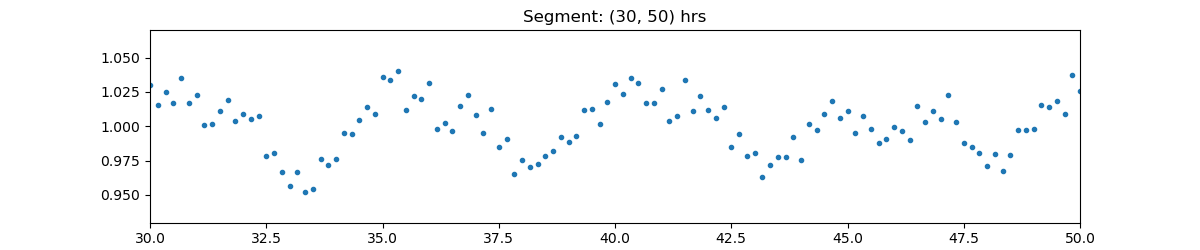

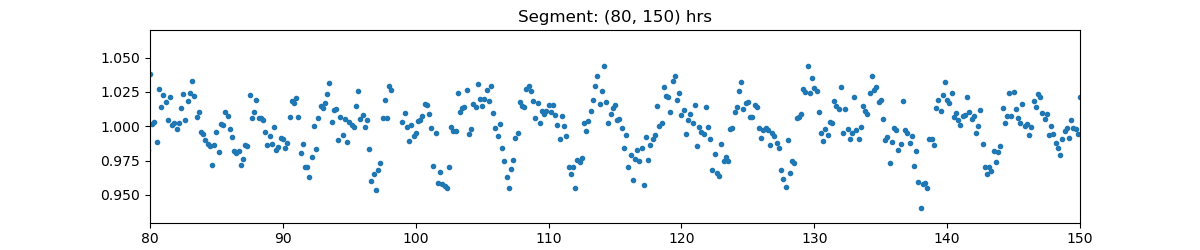

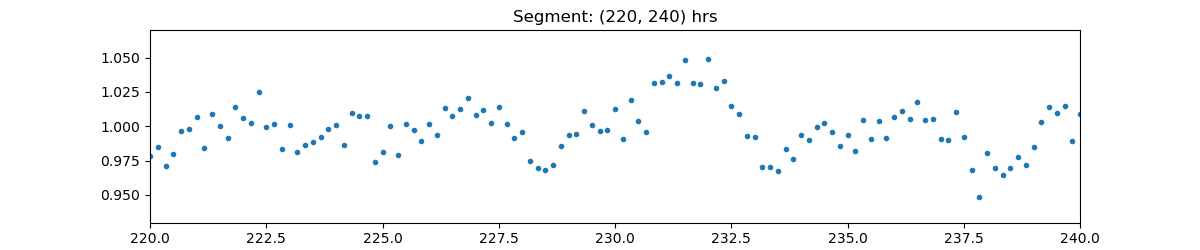

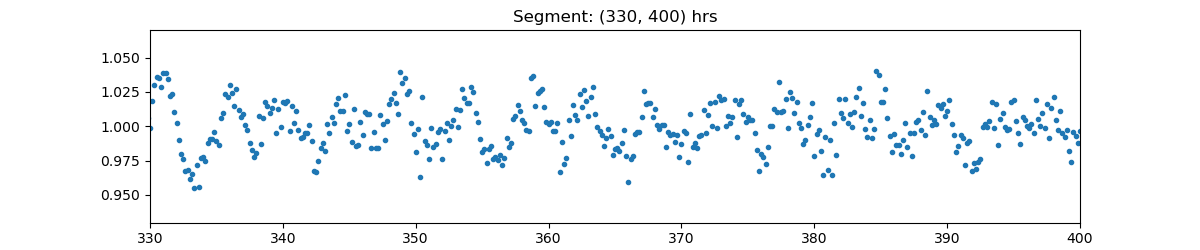

In [71]:
time, lc = data.TIME, data.lc_corrected
# segments = [(30,80), (80,130), (130,180), (180,230)]
segments = [(30,50), (80,150), (220,240), (330, 400)]
plt.close('all')
for seg in segments:
    plt.figure(figsize=(12, 2.5)), plt.plot(time, lc, ls='', marker='o', ms=3.0), plt.xlim(seg), plt.xlabel('Hrs'), plt.title("Segment: "+str(seg)+" hrs"), plt.ylim((0.93, 1.07))

In [252]:
handle_case


'freeFreq'